<a href="https://colab.research.google.com/github/vananya19/fmml_aiml_lab_and_projects/blob/main/notebook1_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [15]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [14]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    56
Heads    44
Name: count, dtype: int64


In [17]:
results = pd.Series([np.sum(toss_coin(40) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [20]:
results = pd.Series([np.sum(toss_coin(700) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [22]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [27]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', 'B', '3', '6', '5', '6', '7', '8', '9', '11', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

3 cards were thrown: 5D QS 3H AH
9 cards were thrown: JH 6C 7S 8H BH 3S QD KH 11D AH
3 cards were thrown: BS KD 9H AS
7 cards were thrown: 8H 9C 8S 7D 11C KS 6D AC
5 cards were thrown: 7S 7C 11D 8D 6H AD
2 cards were thrown: 7H QD AC
4 cards were thrown: 8H BD BH KS AS
1 cards were thrown: QS AC
10 cards were thrown: 6D QH 8S BC 11H 3H 5C 9H 6H 6C AD
5 cards were thrown: JC 11C 7S 6S BC AC

9.4734 cards are tossed before we see the first ace!


In [28]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

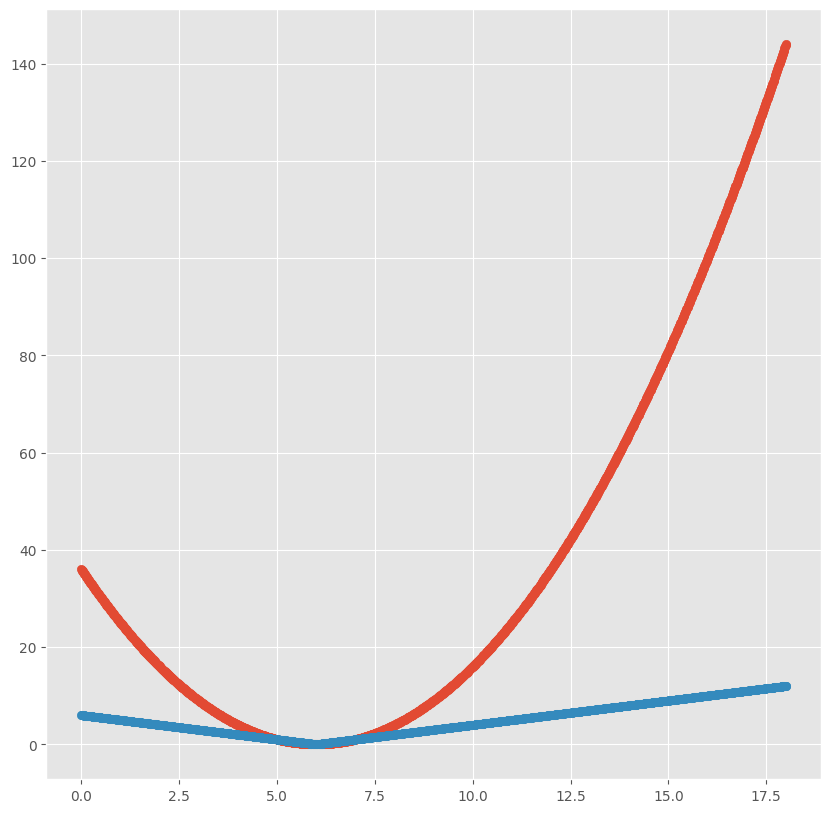

In [31]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 18, 2000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [32]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)

# Select only numeric columns
grades.select_dtypes(include="number").agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


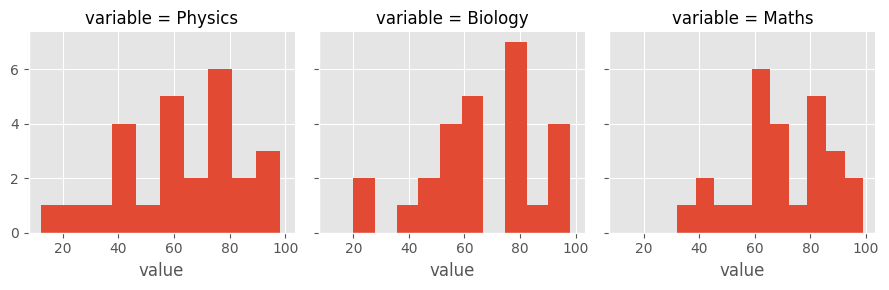

In [34]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [36]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [41]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [40]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [43]:
from scipy.stats import binom

In [44]:
from scipy.stats import norm

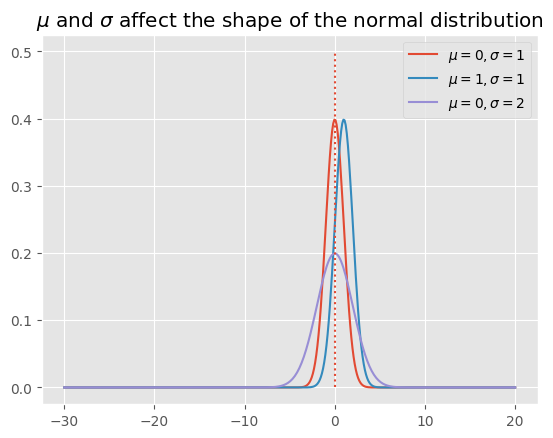

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-30, 20, 400)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label=r"$\mu=0, \sigma=1$")
plt.plot(x, f2, label=r"$\mu=1, \sigma=1$")
plt.plot(x, f3, label=r"$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title(r"$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [53]:
norm.ppf(0.8)

np.float64(0.8416212335729143)

In [54]:
norm.ppf(0.84, loc=169.57, scale=7.57)

np.float64(177.09804617589782)

In [56]:
16.57 + 7.57

24.14

In [58]:
norm.ppf(0.975, loc=16.57, scale=7.57)

np.float64(31.40692736296821)

In [60]:
166.57 + 2 * 7.57

181.70999999999998

In [62]:
norm.ppf(0.0015, loc=166.57, scale=7.57)

np.float64(144.10422390516268)

In [63]:
166.57 - 3 * 7.57

143.85999999999999

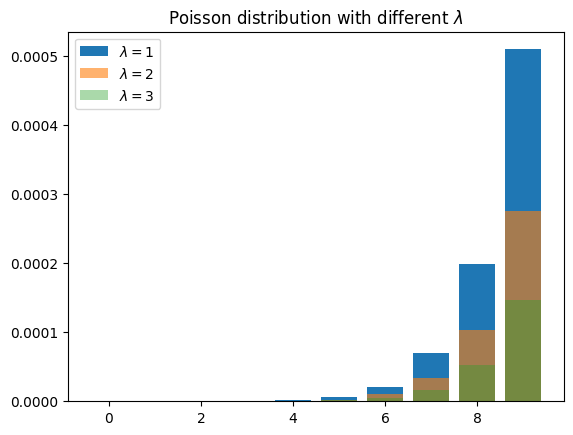

In [14]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Poisson distribution with different λ values
x = np.arange(10)
f1 = poisson.pmf(x, mu=23)
f2 = poisson.pmf(x, mu=24)
f3 = poisson.pmf(x, mu=25)

plt.bar(x, f1, label=r"$\lambda=1$")
plt.bar(x, f2, label=r"$\lambda=2$", alpha=0.6)
plt.bar(x, f3, label=r"$\lambda=3$", alpha=0.4)

plt.legend()
plt.title(r"Poisson distribution with different $\lambda$")
plt.show()

In [11]:
from scipy.stats import norm

norm.ppf(0.975, loc=169.57, scale=7.57)

np.float64(184.4069273629682)

In [17]:
160.57 + 2 * 7.57

175.70999999999998

In [18]:
160.57 - 3 * 7.57

137.85999999999999

In [16]:
norm.ppf(0.0015, loc=189.57, scale=9.57)

np.float64(161.16874805447912)

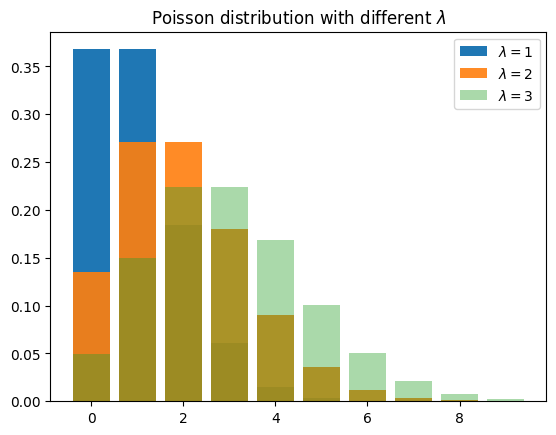

In [23]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

from scipy.stats import poisson

# Poisson distribution with different λ values
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label=r"$\lambda=1$")
plt.bar(x, f2, label=r"$\lambda=2$", alpha=0.9)
plt.bar(x, f3, label=r"$\lambda=3$", alpha=0.4)

plt.legend()
plt.title(r"Poisson distribution with different $\lambda$")
plt.show()

In [24]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f2
# see that this is equal to lambda

np.float64(1.999525105343477)

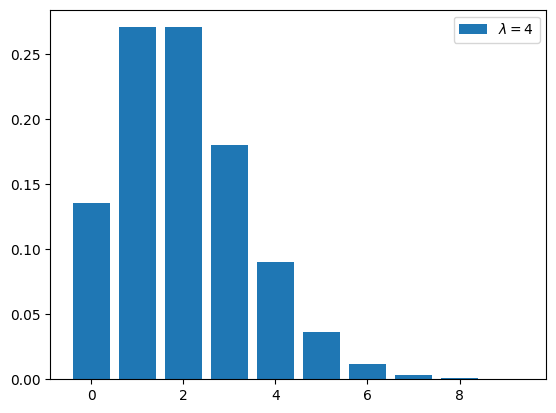

In [27]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label=r"$\lambda=4$")
plt.legend()

In [28]:
x @ f1

np.float64(0.999998874797402)

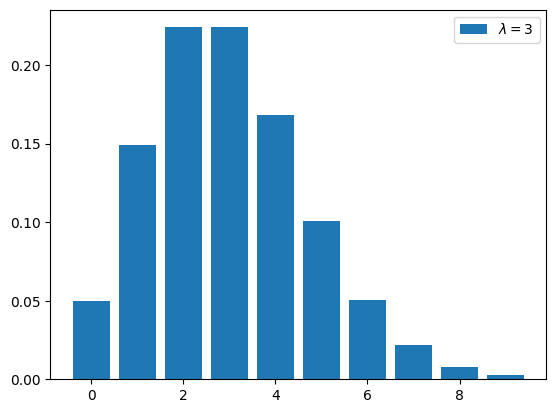

In [29]:
plt.bar(x, f3, label=r"$\lambda=3$")
plt.legend()

In [32]:
poisson.pmf(9, 15)

np.float64(0.03240716721973691)

In [34]:
from scipy.stats import poisson

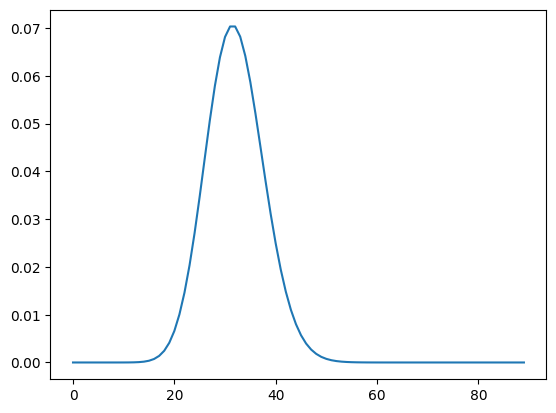

In [36]:
bins = np.arange(0, 90)
p_pois = poisson.pmf(bins, mu=32)
plt.plot(bins, p_pois)

(array([  2.,   4.,  27.,  52.,  72., 100.,  70.,  38.,  27.,   8.]),
 array([11.16666667, 11.32133333, 11.476     , 11.63066667, 11.78533333,
        11.94      , 12.09466667, 12.24933333, 12.404     , 12.55866667,
        12.71333333]),
 <BarContainer object of 10 artists>)

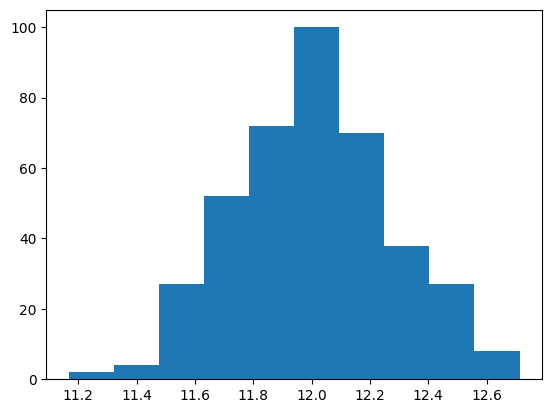

In [40]:
def sample_pois(_):
    samples = poisson.rvs(mu=12, size=150)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

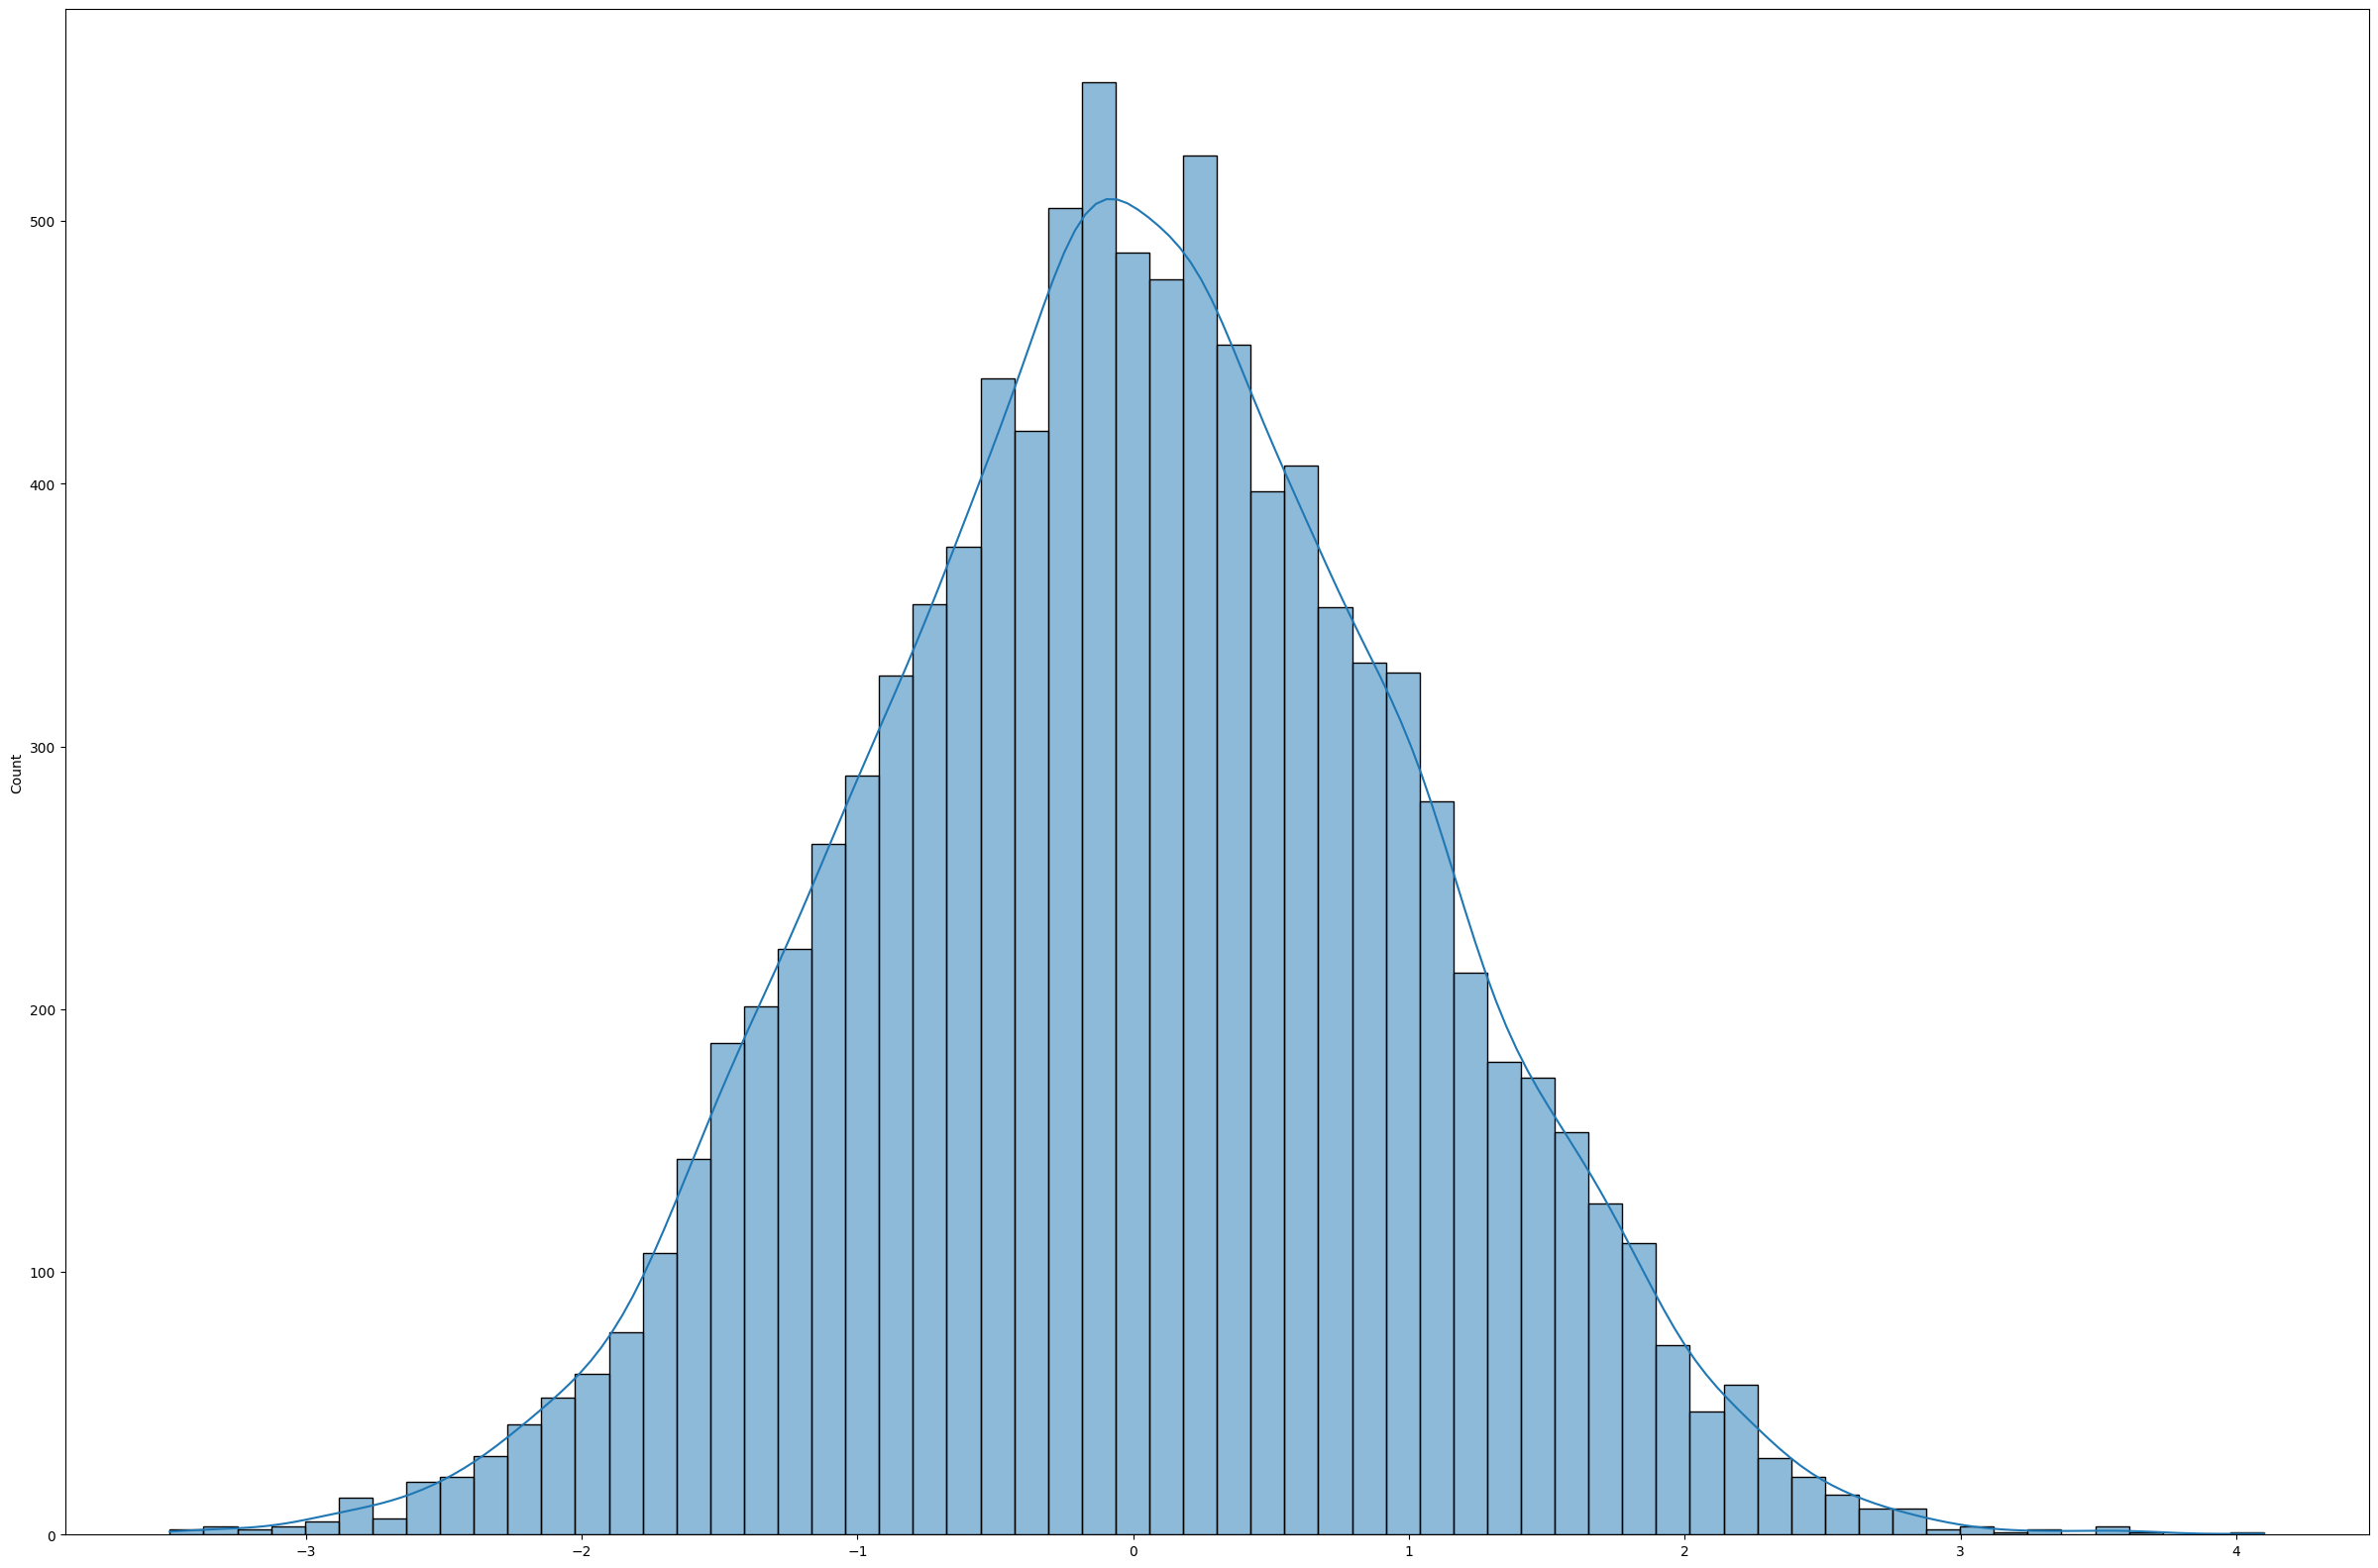

In [47]:
import seaborn as sns
plt.figure(figsize=(30, 20))
x = np.random.normal(size=(10000))
sns.histplot(x, kde=True)
plt.show()

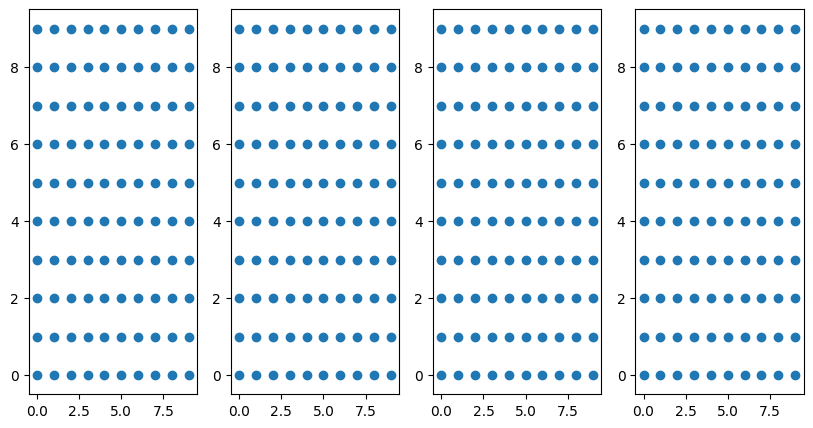

In [50]:
fix, axs = plt.subplots(1, 4, figsize=(10, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

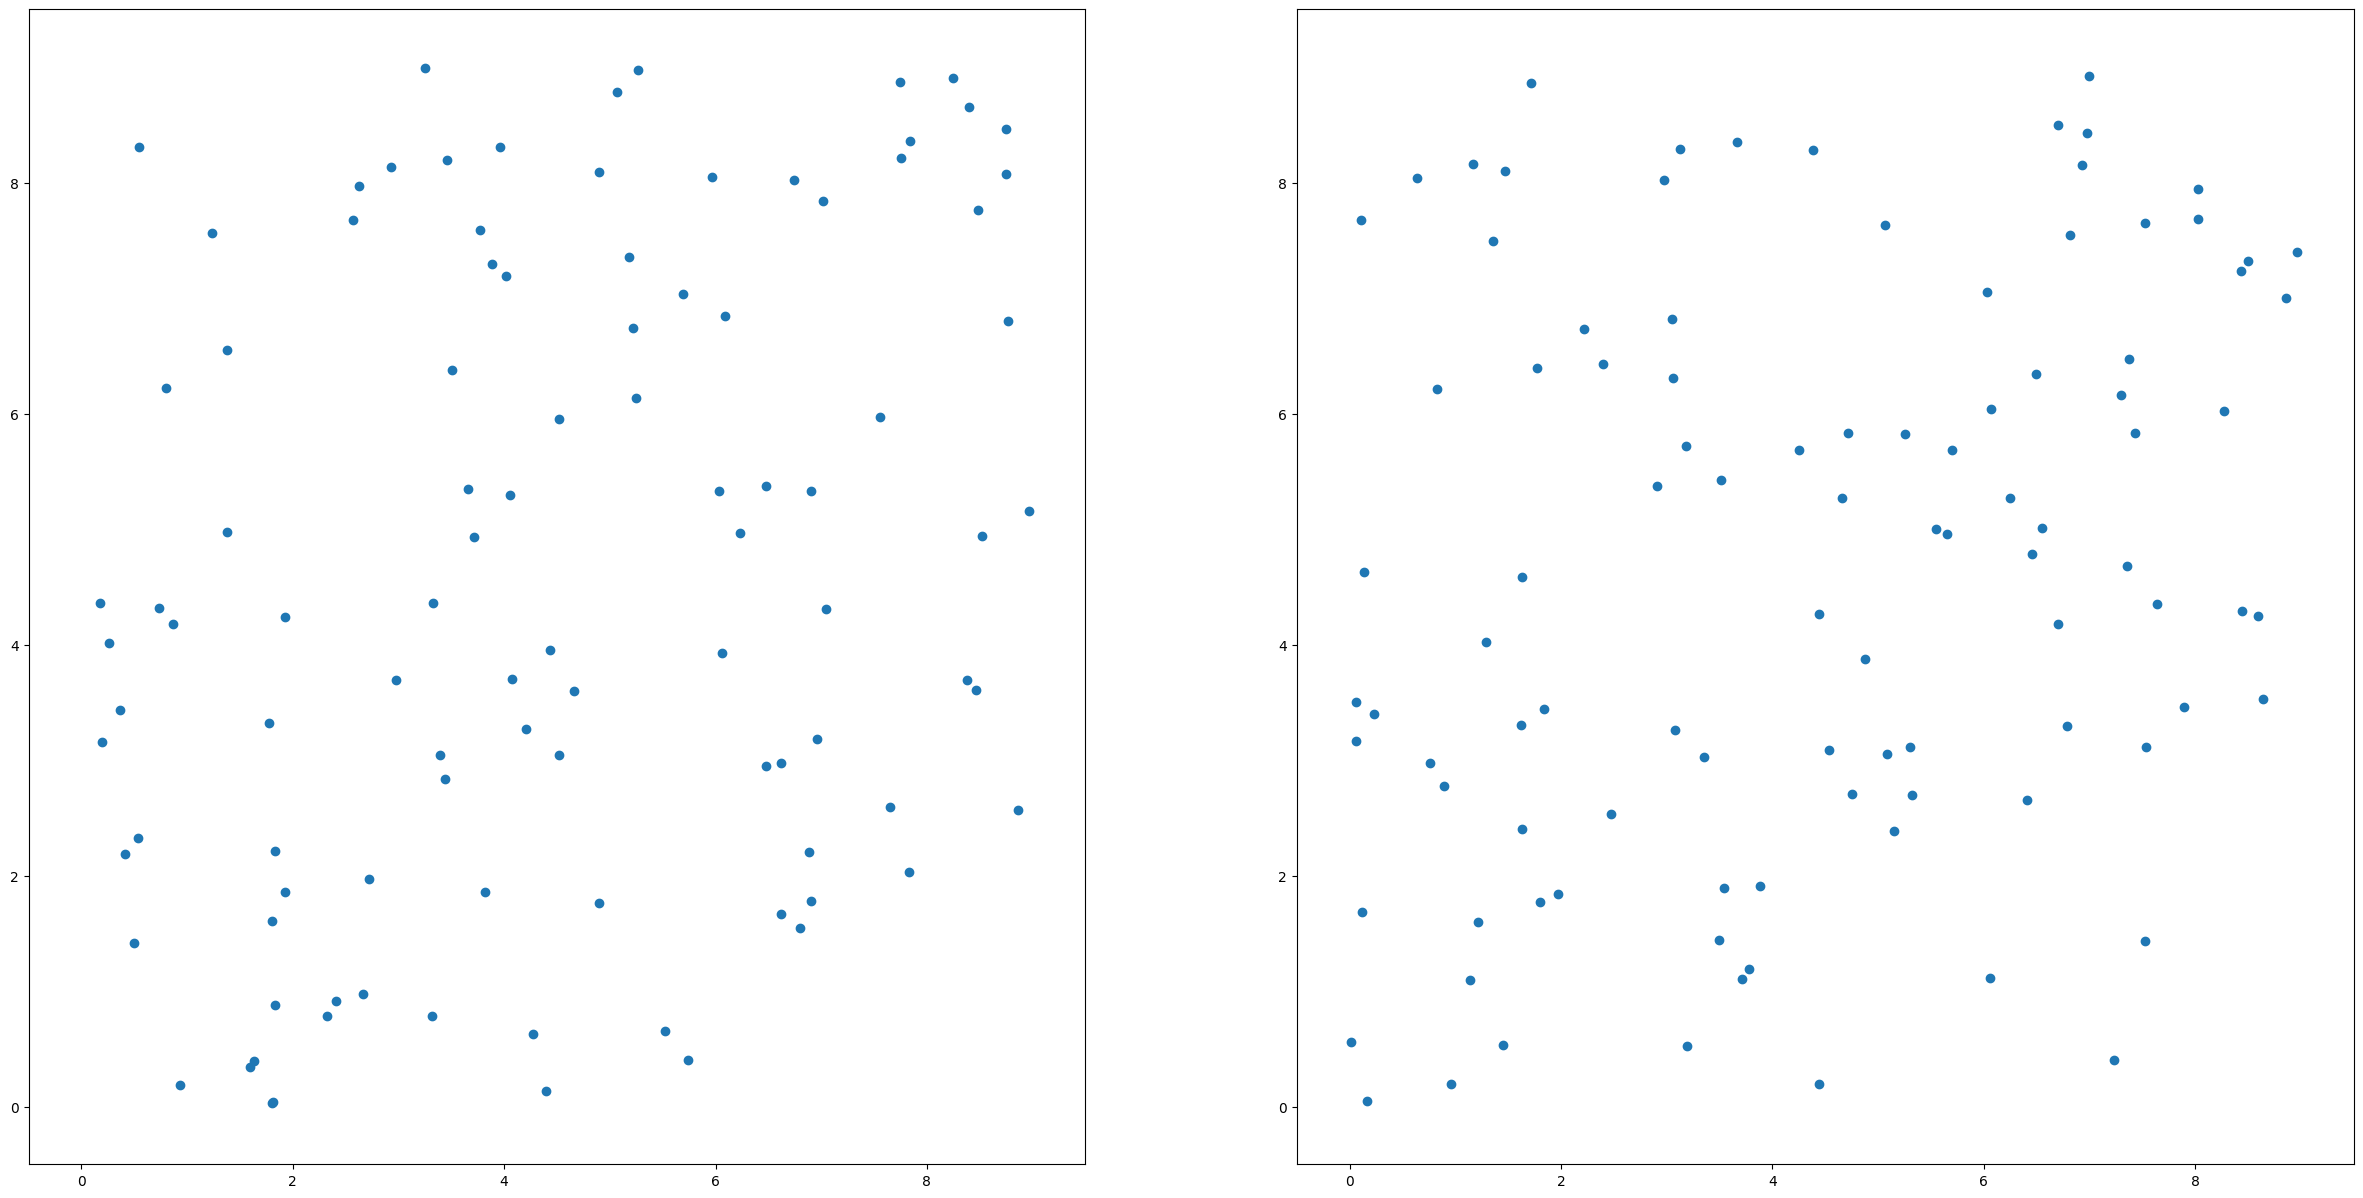

In [53]:
fix, axs = plt.subplots(1, 2, figsize=(30, 15))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

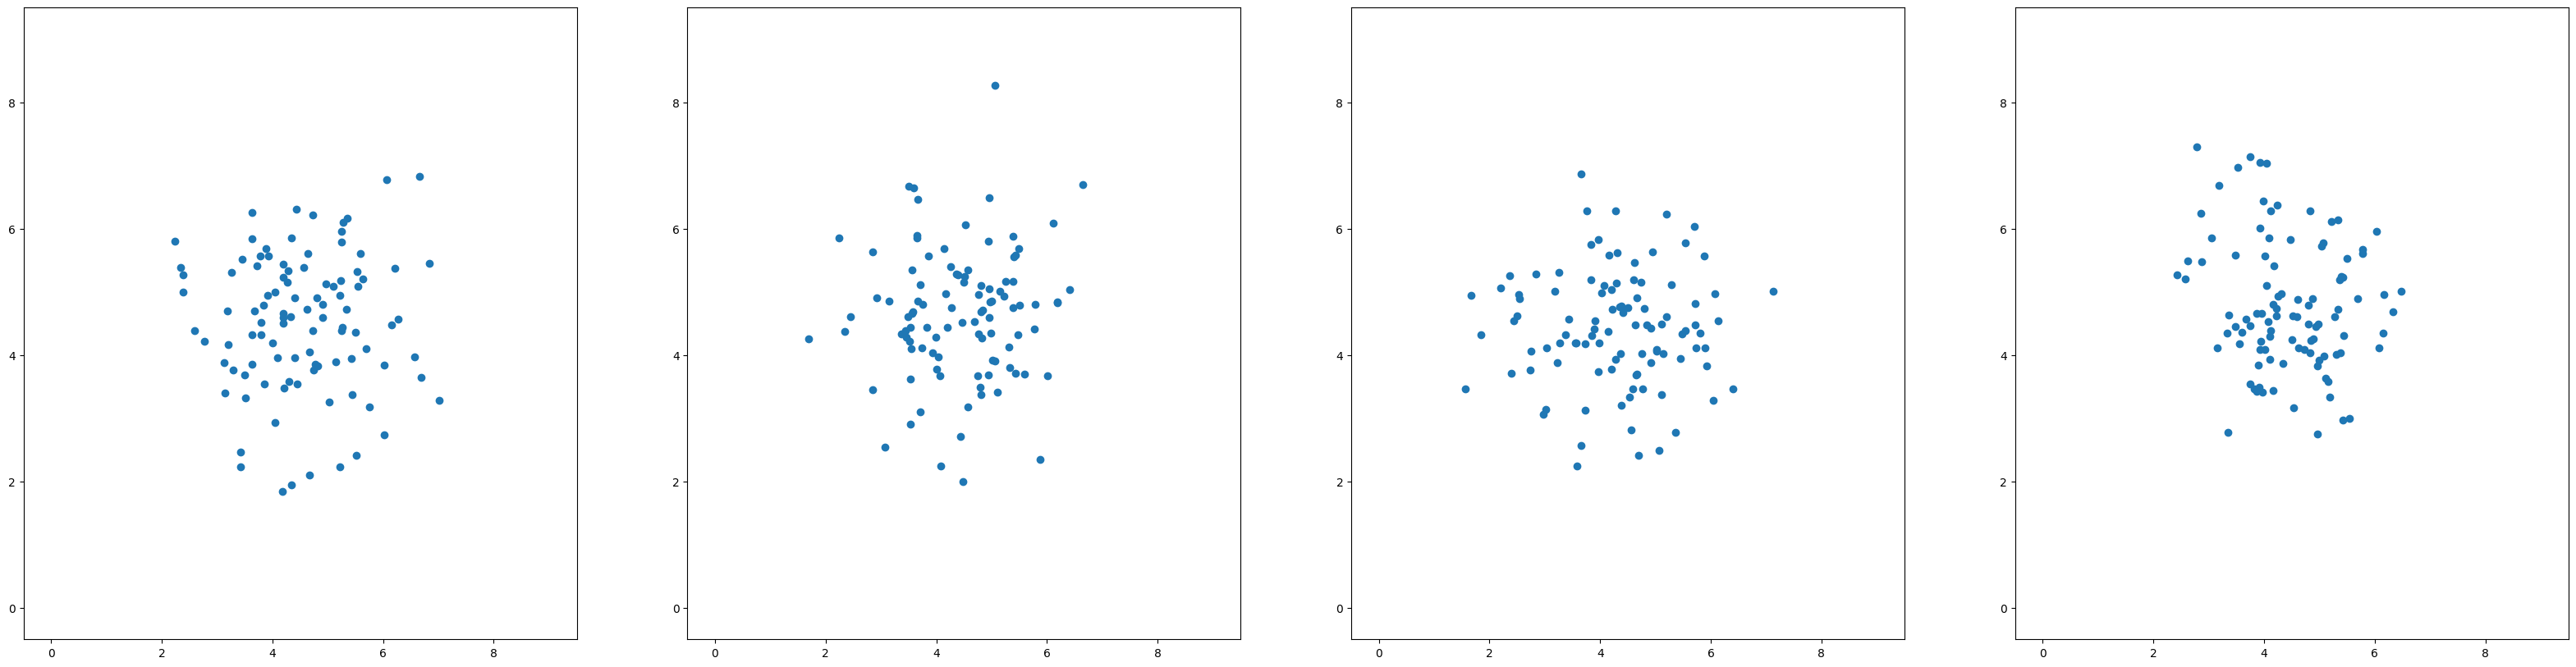

In [55]:
fix, axs = plt.subplots(1, 4, figsize=(40, 10))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()